# Fitting Models Exercise 1

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Fitting a quadratic curve

For this problem we are going to work with the following model:

$$ y_{model}(x) = a x^2 + b x + c $$

The true values of the model parameters are as follows:

In [2]:
a_true = 0.5
b_true = 2.0
c_true = -4.0

First, generate a dataset using this model using these parameters and the following characteristics:

* For your $x$ data use 30 uniformly spaced points between $[-5,5]$.
* Add a noise term to the $y$ value at each point that is drawn from a normal distribution with zero mean and standard deviation 2.0. Make sure you add a different random number to each point (see the `size` argument of `np.random.normal`).

After you generate the data, make a plot of the raw data (use points).

In [3]:
xdata=np.linspace(-5,5,30)
dy=2
sigma=np.random.normal(0,dy,30)
ydata=a_true*xdata**2+b_true*xdata+c_true+sigma

In [4]:
assert True # leave this cell for grading the raw data generation and plot

Now fit the model to the dataset to recover estimates for the model's parameters:

* Print out the estimates and uncertainties of each parameter.
* Plot the raw data and best fit of the model.

In [5]:
def modl(x,a,b,c):
    y=a**2+b*x+c
    return y
def derivs(theta,x,y,dy):
    a=theta[0]
    b=theta[1]
    c=theta[2]
    return (y-a*x**2-b*x-c/dy)

In [6]:
assert True # leave this cell for grading the fit; should include a plot and printout of the parameters+errors

In [9]:
bestfit=opt.leastsq(derivs,np.array((1,2,-5)),args=(xdata,ydata,dy),full_output=True)
thetabest=bestfit[0]
thetacov=bestfit[1]

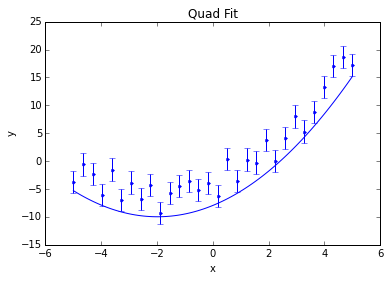

In [10]:
plt.errorbar(xdata,ydata,dy,fmt='b.')
xfit=np.linspace(-5,5,100)
yfit=thetabest[0]*xfit**2+thetabest[1]*xfit+thetabest[2]
plt.plot(xfit,yfit)
plt.title('Quad Fit')
plt.xlabel('x')
plt.ylabel('y')